### Extract the Lyapunov exponent from two data runs from two identical double pendula set into oscillation. Data consists of the angles made by each member of a double pendlum with respect to the vertical reference line passing through the pivots measured at regular time intervals. Use only the data collected within the first 2 seconds of the oscillation. The distance in the phase space is calculated. The chi-square is calculated between the measured data and an exponential fit parametrized by the Lyapunov exponent. Number of data points used in the chi-square determination and the Lyapunov exponent corresponding to minimum chi-square are reported.<br>
### A sample data set is given as mentioned in Shinbrot-Yorke's paper. The data used here are from two separate runs for a single double pendulum where they measure angles $\theta_{1}$, $\theta_{2}$ ($=\theta_{2a}$), $\phi_{1}$, and $\phi_{2}$ ($=\phi_{2a}$). When analyzing this sample data, set Protractor = 2. 

In [207]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from matplotlib import pyplot as plt
from scipy import stats
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
columns = ["t", "theta_1", "theta_2a", "phi_1", "phi_2a"]
angle_in = pd.read_excel('dbl_pend.xlsx', usecols=columns)# read data as a table. This data set is from Shinbrot and Yorke paper
data_arr = angle_in.to_numpy()#convert tabulated angle data into arrays
print(angle_in)#print collected data as a table with headers
print("data array", data_arr)#print collected data in an array format
N = len(angle_in["t"])#number of time intervals over which measurement is done, each spaced deltat apart
#print("N",N)
angv = np.zeros([N,5])# two dimensional array for angular velocity
s = np.zeros([N])#one dimensional array for measured distance in phase space
logs = np.zeros([N])#one dimensional array - natural log of s[i]
FPS = 25 #Number of frames per second

       t  theta_1  theta_2a  phi_1  phi_2a
0   0.04    141.7     169.8  141.1   169.3
1   0.08    136.9     179.6  137.0   179.1
2   0.12    127.8     197.5  129.4   182.6
3   0.16    114.8     202.2  117.4   190.3
4   0.20     98.7     205.9  100.8   204.0
5   0.24     78.9     205.0   97.5   205.6
6   0.28     50.6     180.5   55.1   186.3
7   0.32     15.7     127.1   22.7   140.2
8   0.36     -2.3      47.2   -1.8    66.2
9   0.40     -2.3     -57.2   -1.8   -38.0
10  0.44    -22.0    -135.1  -18.0  -120.8
11  0.48    -52.8    -189.8  -48.1  -182.0
12  0.52    -83.1    -220.0  -78.7  -216.1
13  0.56   -106.6    -231.2 -103.3  -233.2
14  0.60   -121.0    -233.0 -120.0  -235.4
data array [[ 4.000e-02  1.417e+02  1.698e+02  1.411e+02  1.693e+02]
 [ 8.000e-02  1.369e+02  1.796e+02  1.370e+02  1.791e+02]
 [ 1.200e-01  1.278e+02  1.975e+02  1.294e+02  1.826e+02]
 [ 1.600e-01  1.148e+02  2.022e+02  1.174e+02  1.903e+02]
 [ 2.000e-01  9.870e+01  2.059e+02  1.008e+02  2.040e+02]
 [ 2.400e-0

#### <span style = "color:red"> Setup the protractor to measure the angles as described below: </span> <br>

$\theta_{1}$: (theta_1) - Angle made by the top member of double pendulum 1 with respect to the vertical passing through the fixed top pivot point. <br>
$\theta_{2a}$: Angle made by the bottom member of double pendulum 1 with respect to the base reference line - the line passing through the center of mass of the top member and the fixed top pivot point (theta_2a). <br>
$\phi_{1}$: Angle made by the top member of double pendulum 2 with respect to the vertical passing through the fixed top pivot point (phi_1). <br>
$\phi_{2a}$: Angle made by the bottom member of double pendulum 2 with respect to the base reference line - the line passing through the center of mass of the top member and the fixed top pivot point (phi_2a). <br>

Note: <br>
$\theta_{1}$ and $\phi_{1}$ are positive when top member is to the right of a vertical reference line passing through its fixed pivot and negative when to the left. <br>
$\theta_{2a}$ and $\phi_{2a}$ are positive when the bottom member is to left of the base reference line and negative when the bottom member is to the right of the base reference line.<br>
If you have measured $\theta_{1}$, $\theta_{2a}$, $\phi_{1}$ and $\phi_{2a}$, then set the <strong> Protractor= 1 </strong><br>
The codes below will calculate angles $\theta_{2}$ and $\phi_{2}$.

#### <span style = "color:red"> However, to calculate the distance in the phase space, you need the angles below which can be derived using some trigonometry. </span> <br>
$\theta_{1}$: Angle made by the top member of double pendulum 1 with respect to the vertical line passing through the fixed top pivot point (theta_1) <br>
$\theta_{2}$: Angle made by the bottom member of double pendulum 1 with respect to a vertical passing through the oscillating lower pivot point (theta_2). <br>
$\phi_{1}$: Angle made by the top member of double pendulum 2 with respect to the vertical passing through the fixed top pivot point (phi_1). <br>
$\phi_{2}$: Angle made by the bottom member of double pendulum 2 with respect to a vertical passing through the oscillating lower pivot point (phi_2). <br>
If you have directly measured $\theta_{1}$, $\theta_{2}$, $\phi_{1}$ and $\phi_{2}$ then set the <strong>Protactor=2</strong>

#### <span style = "color:red"> Calculate the angles </span>

In [193]:
Protractor = 2 #set to 1 if you have measured theta_2a and phi_2a; set to 2 if you have measured theta_2 and phi_2

In [194]:
if Protractor == 1:
        for i in np.arange(N-1):
            if data_arr[i,2] >= 0:
                data_arr[i,2] = -(180 - data_arr[i,2])+data_arr[i,1] #theta_2 is defined to be negative when to the left of a vertical line passing through the lower oscillating pivot point.
            elif data_arr[i,2] < 0:
                data_arr[i,2]= -(-180 - data_arr[i,2])+data_arr[i,1] #theta_2 is defined to be positive when to the right of a vertical line passing through the lower oscillating pivot point.
            if data_arr[i,4] >= 0:
                data_arr[i,4] = -(180 - data_arr[i,4])+data_arr[i,3] #phi_2 is defined to be negative when to the left of a vertical line passing through the lower oscillating pivot point.
            elif data_arr[i,4] < 0:
                data_arr[i,4] = -(-180 - data_arr[i,4])+data_arr[i,3] #phi_2 is defined to be positive when to the right of a vertical line passing through the lower oscillating pivot point.
elif Protractor == 2:  
    print('No calculation of theta_2 and phi_2 needed. Already measured. Proceed to calculate distance in phase space.')
   

No calculation of theta_2 and phi_2 needed. Already measured. Proceed to calculate distance in phase space.


#### <span style = "color:red">Calculate angular velocities</span>

In [195]:
deltat = data_arr[1,0]-data_arr[0,0]
for i in np.arange(N-1):
    angv[i,0] = (data_arr[i+1,1]-data_arr[i,1])/(data_arr[i+1,0]-data_arr[i,0])#theta_1_dot
    angv[i,1] = (data_arr[i+1,2]-data_arr[i,2])/(data_arr[i+1,0]-data_arr[i,0])#theta_2_dot
    angv[i,2] = (data_arr[i+1,3]-data_arr[i,3])/(data_arr[i+1,0]-data_arr[i,0])#phi_1_dot
    angv[i,3] = (data_arr[i+1,4]-data_arr[i,4])/(data_arr[i+1,0]-data_arr[i,0])#phi_2_dot
print(angv)

[[ -120.    245.   -102.5   245.      0. ]
 [ -227.5   447.5  -190.     87.5     0. ]
 [ -325.    117.5  -300.    192.5     0. ]
 [ -402.5    92.5  -415.    342.5     0. ]
 [ -495.    -22.5   -82.5    40.      0. ]
 [ -707.5  -612.5 -1060.   -482.5     0. ]
 [ -872.5 -1335.   -810.  -1152.5     0. ]
 [ -450.  -1997.5  -612.5 -1850.      0. ]
 [    0.  -2610.      0.  -2605.      0. ]
 [ -492.5 -1947.5  -405.  -2070.      0. ]
 [ -770.  -1367.5  -752.5 -1530.      0. ]
 [ -757.5  -755.   -765.   -852.5     0. ]
 [ -587.5  -280.   -615.   -427.5     0. ]
 [ -360.    -45.   -417.5   -55.      0. ]
 [    0.      0.      0.      0.      0. ]]


#### <span style= "color:red"> Calculate distance in phase space </span>

time 0.04 distance in phase space,  1.0488088481701408
time 0.08 distance in phase space,  14.486890625665685
time 0.12 distance in phase space,  15.31567824159284
time 0.16 distance in phase space,  15.767688479926246
time 0.2 distance in phase space,  16.926901665691815
time 0.24 distance in phase space,  23.920075250717744
time 0.28 distance in phase space,  10.650352106855435
time 0.32 distance in phase space,  17.25311566065677
time 0.36 distance in phase space,  19.007630046904847
time 0.4 distance in phase space,  20.12833823245228
time 0.44 distance in phase space,  16.2243643943299
time 0.48 distance in phase space,  9.911104882907866
time 0.52 distance in phase space,  8.401785524517985
time 0.56 distance in phase space,  4.509988913511872
time 0.6 distance in phase space,  2.6000000000000054


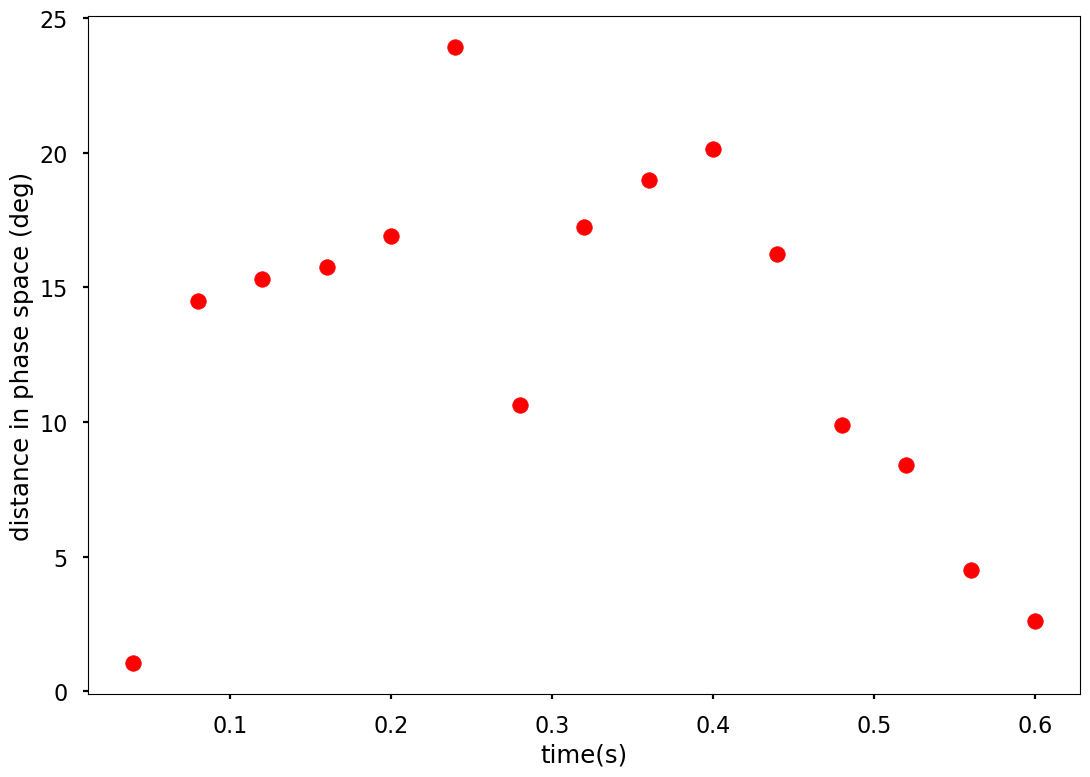

In [196]:
for i in np.arange(N):
        s[i] = np.sqrt(((data_arr[i,1]-data_arr[i,3])**2)+((data_arr[i,2]-data_arr[i,4])**2)+(((angv[i,0]-angv[i,2])*deltat)**2)+(((angv[i,1]-angv[i,3])*deltat)**2))
        print("time", data_arr[i,0],"distance in phase space, ", s[i])
        plt.scatter(data_arr[i,0],s[i],color = "red")
plt.xlabel("time(s)")
plt.ylabel("distance in phase space (deg)")
plt.show()

#### <span style="color:red"> Fit log (phase space distance) vs. time by linear regression </span>
#### This provides only a linear regression fit without attempting to minimize chisquare. 

[0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6 ]
[0.04765509 2.67324415 2.72887703 2.75796281 2.82890417 3.17471808
 2.36559295 2.84799275 2.94484048 3.00212868 2.78651409 2.29365583
 2.12844425 1.5062947  0.95551145]


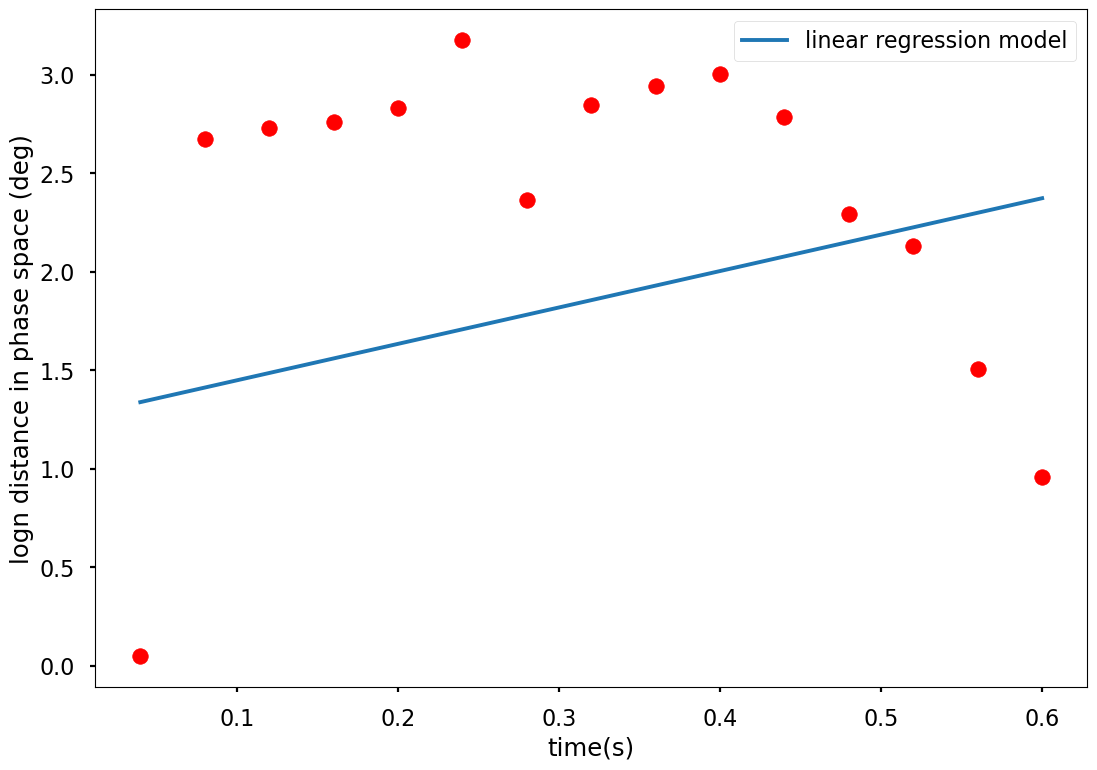

In [197]:
for i in np.arange(N):
        s[i] = np.sqrt(((data_arr[i,1]-data_arr[i,3])**2)+((data_arr[i,2]-data_arr[i,4])**2)+(((angv[i,0]-angv[i,2])*deltat)**2)+(((angv[i,1]-angv[i,3])*deltat)**2))
        logs[i] = np.log(s[i])
        plt.scatter(data_arr[i,0],logs[i],color = "red")
plt.xlabel("time(s)")
plt.ylabel("logn distance in phase space (deg)")

# Note: This provides only a linear regression fit without attempting to minimize chi square.

m, c, r, p, std_err = stats.linregress(x,y)

x = angle_in["t"].to_numpy(np.float64)
print(x)
y = logs
print(y)
def linfunc(x):
    return m*x + c
my_model = list(map(linfunc,x))
plt.plot (x, my_model, label = 'linear regression model')
plt.legend()
plt.show()

#### <span style= "color: red"> Calculate and minimize chi square </span>

In [198]:
deltat = 1/FPS #time interval between frames, this should be the same as data_arr[1,0]-data_arr[0,0]
chisqr = np.zeros([N])
result = np.zeros([N])
csum = np.zeros([N])#cumulative sum of chisquare
lmda = [0.1, 0.5, 1, 1.5, 2, 2.5, 3.0, 3.5, 4, 4.5, 5, 5.5, 6.0, 6.5, 7]#must have same number of values as N
n = 1
def chisquare(k,l):# k: number of terms (frames or time intervals) in the summation and Lyapunov exponent,l
    chisqr = (s - (s[0]*np.exp(k*deltat*l)))**2/(s[0]*np.exp(k*deltat*l))#calculate chisquare between model and measured data
    return chisqr
for j in lmda:
    result = 0
    if n <= N:
        result = 0
        for i in range(n):
            result = chisquare(i,j)
        csum=np.cumsum(result)#cumulative sum of chisquare terms
        csumin=np.min(csum)
        #print ('terms=', i, 'lambda=', j, 'chisquare=', result)
        print ('lambda =', j, 'cumulative sum of chisquare', csum, 'csum minimum=', csumin)
        n = n + 1
    elif n > N:
        break
        
    #print ("number of terms in summation", i, "lambda", j, result_sum)

lambda = 0.1 cumulative sum of chisquare [   0.          172.1782212   366.24939313  572.81269395  813.19380054
 1311.94514858 1399.84451471 1650.20430118 1957.7143488  2304.80184921
 2524.38188664 2599.26711587 2650.81727784 2662.23953793 2664.53375388] csum minimum= 0.0
lambda = 0.5 cumulative sum of chisquare [4.19537524e-04 1.68237519e+02 3.57901238e+02 5.59791825e+02
 7.94784671e+02 1.28275474e+03 1.36853375e+03 1.61329477e+03
 1.91400491e+03 2.25346444e+03 2.46809593e+03 2.54114778e+03
 2.59138640e+03 2.60244583e+03 2.60463361e+03] csum minimum= 0.0004195375235724852
lambda = 1 cumulative sum of chisquare [6.71595733e-03 1.56887625e+02 3.33850834e+02 5.22276227e+02
 7.41741140e+02 1.19863653e+03 1.27830818e+03 1.50693441e+03
 1.78804720e+03 2.10552226e+03 2.30589339e+03 2.37366515e+03
 2.42012802e+03 2.43014659e+03 2.43203261e+03] csum minimum= 0.006715957326297252
lambda = 1.5 cumulative sum of chisquare [3.40732556e-02 1.39456181e+02 2.96891766e+02 4.64612736e+02
 6.60198797e+0

#### <span style = "color:red"> Plot chi square function versus lambda and number of terms allowed in the summation

/tmp/ipykernel_63/1083725578.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


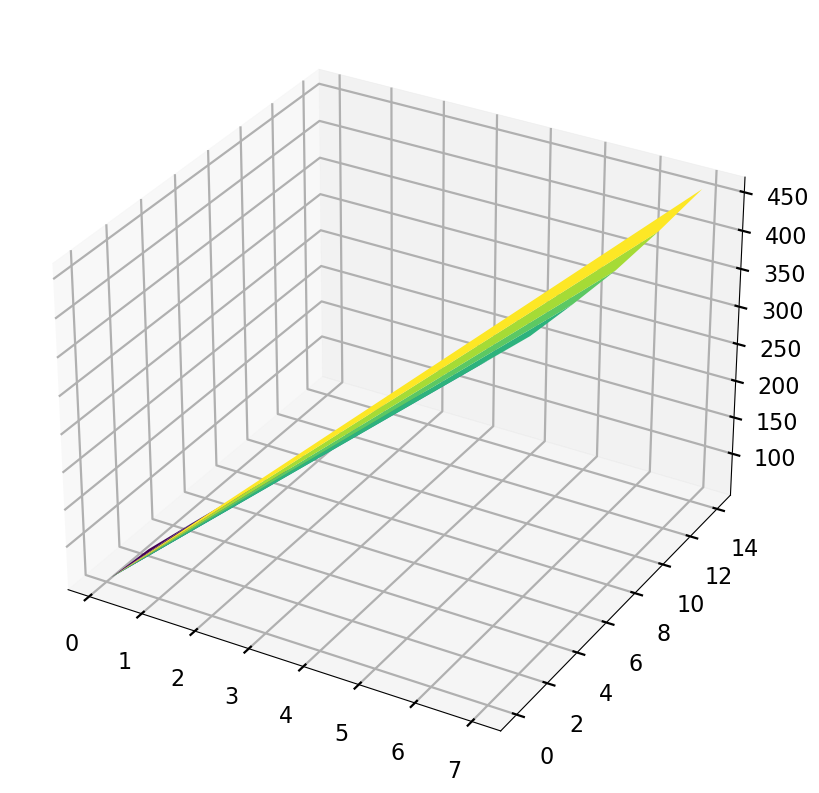

In [209]:
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
#ax = plt.figure().add_subplot(projection='3d')
x3d = lmda
y3d = np.arange(0,N)
z3d = csum
ax.plot_trisurf(x3d,y3d,z3d, cmap='viridis')
plt.show()

#for angle in range(0,360):
 #   ax.view_init(30,angle)
  #  plt.draw()
   # plt.pause(0.001)



